In [2]:
%reload_ext autoreload
%autoreload 2

import sys
from preprocessing_merge import *


/Users/gracengu/opt/anaconda3/envs/cs5228_hdb/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning:

The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.



In [ ]:
# # Read train and test data
# DATAPREPROCESSING_DIRECTORY = "/content/drive/MyDrive/Masters - Knowledge Discovery and Data Mining/data/"
# train_df = pd.read_csv(DATAPREPROCESSING_DIRECTORY+"merge_hdbtrainstpop_train.csv")
# test_df = pd.read_csv(DATAPREPROCESSING_DIRECTORY+"merge_hdbtrainstpop_test.csv")

In [ ]:
# train_df.shape[0]

431101

# EDA for clusters

In [ ]:
## Check variance of the data (First 30 columns)
## Clustering is probably helpful for data with larger variances --> std**2
# train_df.iloc[:, :30].describe()

,floor_area_sqm,lease_commence_date,elevation,resale_price,opening_year,distance_to_mrt,distance_to_mrt_km,mrt_lrt_links,mrt_interchange_flag,mrt_interchange_count,distance_to_mrt_bins,population_count,adult_count,children_count
count,431101.000000,431101.000000,431101.0,4.311010e+05,378882.000000,431101.000000,431101.000000,431101.000000,431101.000000,431101.000000,431101.000000,431101.000000,431101.000000,431101.000000
mean,96.983167,1989.420758,0.0,3.018275e+05,1996.649764,0.005882,0.652556,0.013340,0.099861,0.099861,0.088685,42449.893296,22465.604232,4146.232577
std,25.191689,10.251010,0.0,1.298678e+05,10.779785,0.003456,0.383359,0.114727,0.299814,0.299814,0.285144,30254.682071,15955.374974,3025.570655
min,31.000000,1966.000000,0.0,2.970000e+04,1987.000000,0.000200,0.022112,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,1983.000000,0.0,2.052000e+05,1988.000000,0.003312,0.367597,0.000000,0.000000,0.000000,0.000000,23940.000000,12660.000000,2020.000000
50%,99.000000,1988.000000,0.0,2.839500e+05,1990.000000,0.005297,0.587645,0.000000,0.000000,0.000000,0.000000,33410.000000,17440.000000,3150.000000
75%,114.000000,1997.000000,0.0,3.735000e+05,2003.000000,0.007747,0.860116,0.000000,0.000000,0.000000,0.000000,54880.000000,29740.000000,6140.000000
max,280.000000,2019.000000,0.0,1.123200e+06,2031.000000,0.031795,3.515776,1.000000,1.000000,1.000000,2.000000,138490.000000,72740.000000,12040.000000


In [ ]:
# # Check variance of the data (31st columns and beyond)
# train_df.iloc[:, 31:].describe()

,teenager_count,young_adult_count,female_count,male_count,male_female_ratio,male_female_ratio_bins,adult_children_ratio,adult_children_ratio_bins,population_bins
count,431101.000000,431101.000000,431101.000000,431101.000000,431101.000000,431101.000000,431101.000000,431101.000000,431101.000000
mean,5232.399600,6162.834788,21483.474081,20966.419215,0.971089,1.999197,3.545471,0.159287,0.382354
std,4062.089314,4875.184865,15300.622271,14962.227449,0.044491,0.038941,0.701280,0.365944,0.634668
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2470.000000,3170.000000,12470.000000,11920.000000,0.955176,2.000000,2.885173,0.000000,0.000000
50%,3950.000000,4610.000000,16840.000000,16320.000000,0.977480,2.000000,3.589521,0.000000,0.000000
75%,6480.000000,8140.000000,27770.000000,27200.000000,0.996490,2.000000,4.017435,0.000000,1.000000
max,16780.000000,22580.000000,70600.000000,67890.000000,1.236239,2.000000,8.533333,1.000000,2.000000


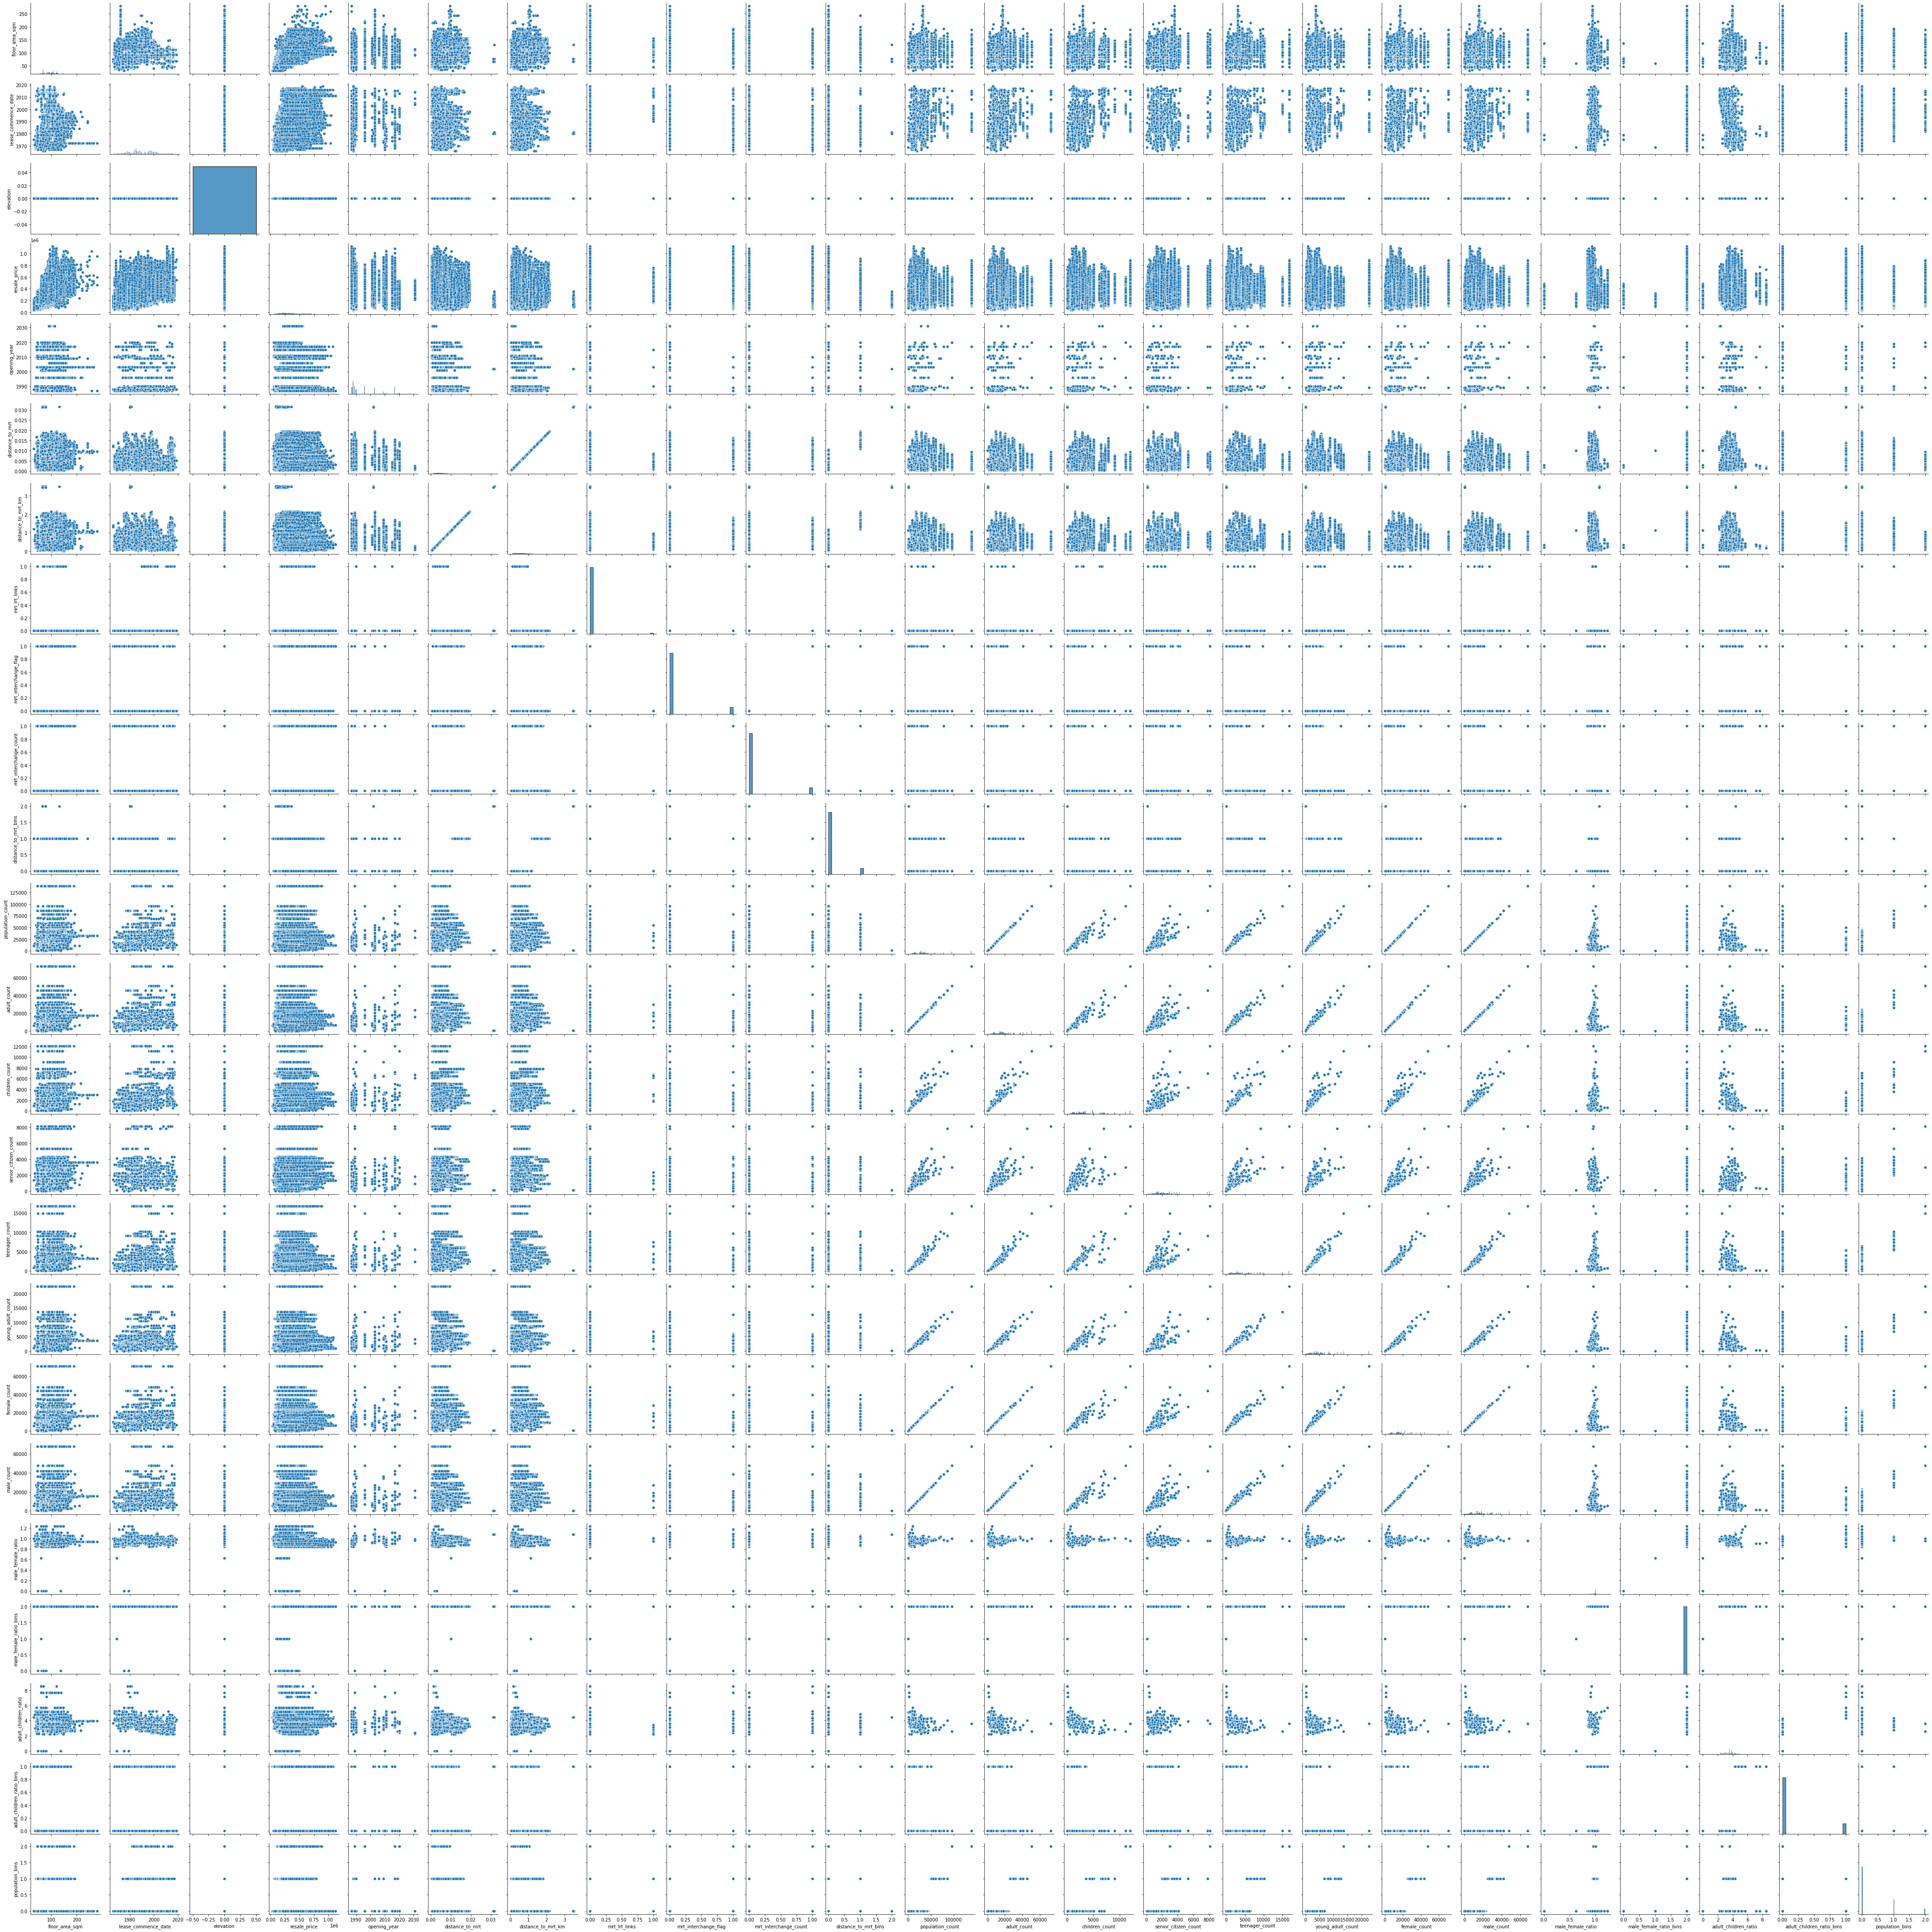

In [ ]:
# Pairwise scatter plot to see if there is any distinctive clusters that can be formed
# If don't have, can do PCA/TSNE transformation before clustering
# fig = sns.pairplot(train_df)
# plt.show()

In [ ]:
# # Find pairwise relationships such as senior citizen count vs. distance to mrt
# The only concern here is variance of distance to mrt is small 
# fig = px.scatter(x=train_df["senior_citizen_count"], y=train_df["distance_to_mrt"])
# fig.update_layout(
#     title="Distance to mrt by senior citizen count",
#     xaxis_title="Senior Citizen Count",
#     yaxis_title="Distance to mrt")
# pyo.plot(fig)
# CLUSTERING_DIRECTORY = "/content/drive/MyDrive/Masters - Knowledge Discovery and Data Mining/cluster/"
# fig.write_image(os.path.join(CLUSTERING_DIRECTORY, "clustering_seniorcit_distancetomrt.png"))

'temp-plot.html'

In [ ]:
# # Checking proportion of high senior citizen count in the data
# 100*train_df.loc[train_df.senior_citizen_count>6000, :].shape[0]/train_df.shape[0]

7.372750237183398

In [ ]:
# # Is there a cluster for if there is a senior citizen count vs. no senior citizen count? 
# temp_nosenior_cit = train_df.loc[train_df.senior_citizen_count==0, :]
# temp_hassenior_cit = train_df.loc[train_df.senior_citizen_count>0, :]

# print(temp_nosenior_cit.shape[0])
# print(temp_hassenior_cit.shape[0])

154
430947


# Testing clustering.py script

In [4]:
%reload_ext autoreload
%autoreload 2
from preprocessing_merge import *
from clustering import *

In [5]:
dataset = pd.read_csv("../data/backup/merge_data.csv")

In [6]:
selected_columns = ['floor_area_sqm', 'distance_to_mrt', 'population_count', 'adult_count', 'children_count', \
                    'senior_citizen_count', 'teenager_count', 'female_count', 'male_count']

In [7]:
pca_data = principal_component_analysis(dataset, selected_columns, plot=False)
kmeans_cluster_data, kmeans_model = kmeans_clustering(
    pca_data, k=2, plot=False)
sampled_data = sample_data(kmeans_cluster_data, perc_sample=0.1)


43141


In [8]:
pca_data.Kmeans_cluster.value_counts()

0    356076
1     75341
Name: Kmeans_cluster, dtype: int64

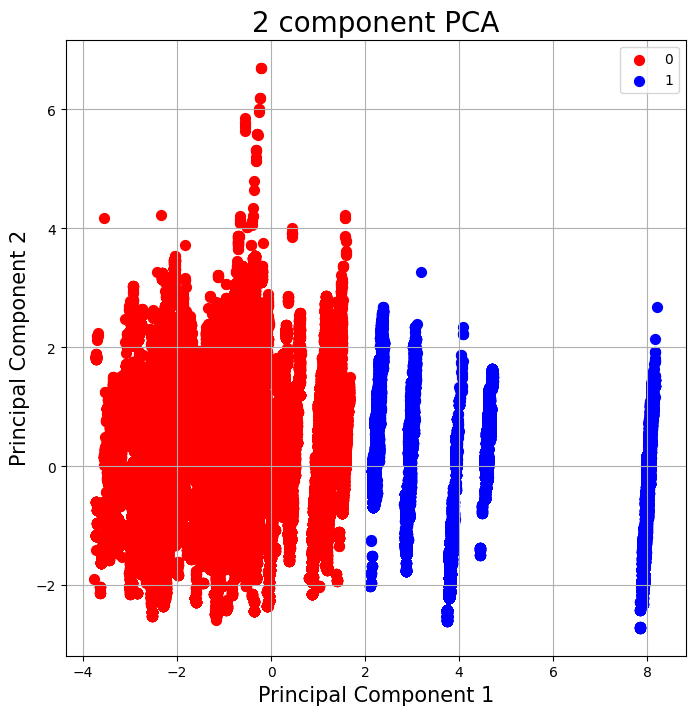

In [9]:
# Plot principal components only
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = [0, 1]
colors = ['r', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = pca_data['Kmeans_cluster'] == target
    ax.scatter(pca_data.loc[indicesToKeep, 'principal component 1']
               , pca_data.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

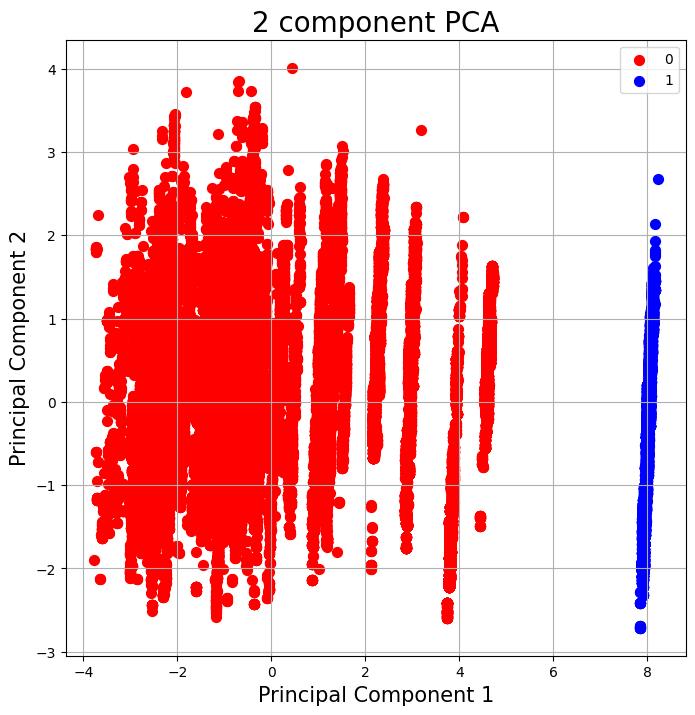

In [13]:
sample_dbscan, dbscan_model = dbscan_clustering(sampled_data, eps=1.5, min_samples=50, plot=True)


In [14]:
sample_dbscan.DBSCAN_cluster.value_counts()

 0    74992
 1    11286
-1        4
Name: DBSCAN_cluster, dtype: int64

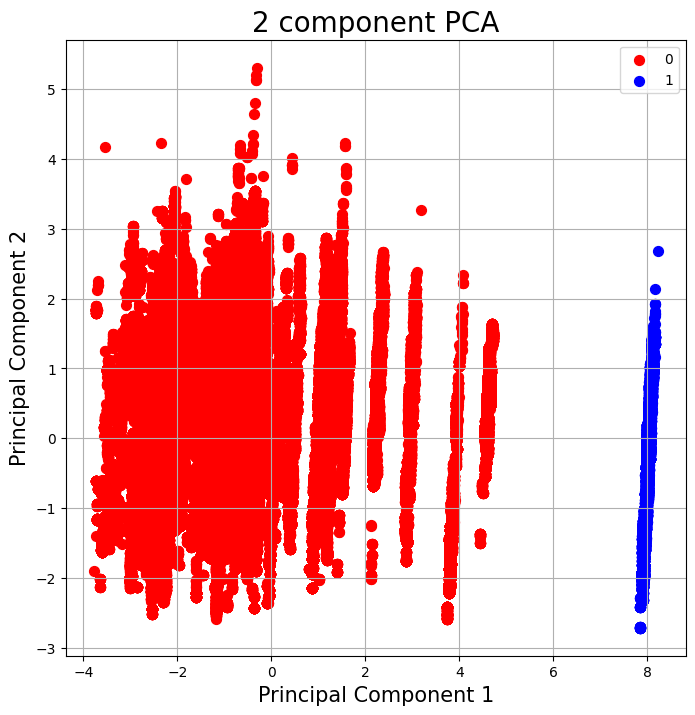

In [15]:
finaldata = dbscan_predict(dbscan_model=dbscan_model, data=pca_data)

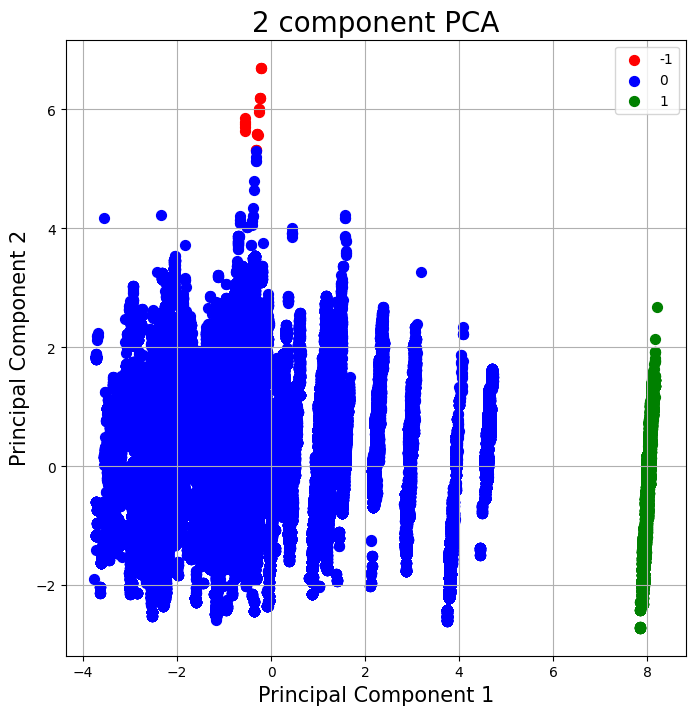

In [16]:
# Plot principal components only
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = [i for i in range(-1, 2, 1)]
colors = ['r', 'b', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finaldata['DBSCAN_cluster'] == target
    ax.scatter(finaldata.loc[indicesToKeep, 'principal component 1']
               , finaldata.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()